### 공통 하이퍼파라미터

1. **criterion**
   - 분할 품질을 측정하는 기능입니다.
   - 분류 (`DecisionTreeClassifier`): `"gini"` (기본값), `"entropy"`
   - 회귀 (`DecisionTreeRegressor`): `"squared_error"` (기본값), `"friedman_mse"`, `"absolute_error"`, `"poisson"`

2. **splitter**
   - 각 노드에서 분할을 선택하는 전략입니다.
   - `"best"` (기본값): 최적의 분할을 선택
   - `"random"`: 무작위 분할을 선택

3. **max_depth**
   - 트리의 최대 깊이입니다. 깊이가 너무 깊으면 모델이 과적합될 수 있습니다.
   - 기본값: `None` (노드가 순수해질 때까지 또는 `min_samples_split`보다 작은 샘플이 될 때까지 분할)

4. **min_samples_split**
   - 내부 노드를 분할하는 데 필요한 최소 샘플 수입니다.
   - 정수: 최소 샘플 수
   - 부동소수점: `0.0`과 `1.0` 사이의 비율 (전체 샘플 수에 대한)

5. **min_samples_leaf**
   - 리프 노드에 있어야 하는 최소 샘플 수입니다.
   - 정수: 최소 샘플 수
   - 부동소수점: `0.0`과 `1.0` 사이의 비율 (전체 샘플 수에 대한)

6. **min_weight_fraction_leaf**
   - 리프 노드에 있어야 하는 최소 가중치 샘플의 비율입니다. 샘플 가중치가 있는 경우 사용됩니다.
   - 기본값: `0.0`

7. **max_features**
   - 각 분할에서 고려할 최대 특징 수입니다.
   - 정수: 최대 특징 수
   - 부동소수점: `0.0`과 `1.0` 사이의 비율 (전체 특징 수에 대한)
   - `"auto"`, `"sqrt"`, `"log2"`, `None`

8. **random_state**
   - 무작위성의 시드를 설정합니다.
   - 정수: 시드 값
   - `None` (기본값)

9. **max_leaf_nodes**
   - 리프 노드의 최대 수입니다. 최적의 리프 노드 수를 찾는 데 사용됩니다.
   - 기본값: `None`

10. **min_impurity_decrease**
    - 분할이 유용하기 위해 필요한 최소 불순물 감소량입니다.
    - 기본값: `0.0`

11. **class_weight** (분류에만 해당)
    - 클래스 가중치입니다. 클래스 불균형을 처리하는 데 사용됩니다.
    - `None` (기본값), `balanced`, 딕셔너리

12. **ccp_alpha**
    - 비용 복잡도 가지치기(최소 비용 복잡도 가지치기) 매개변수입니다.
    - 기본값: `0.0`

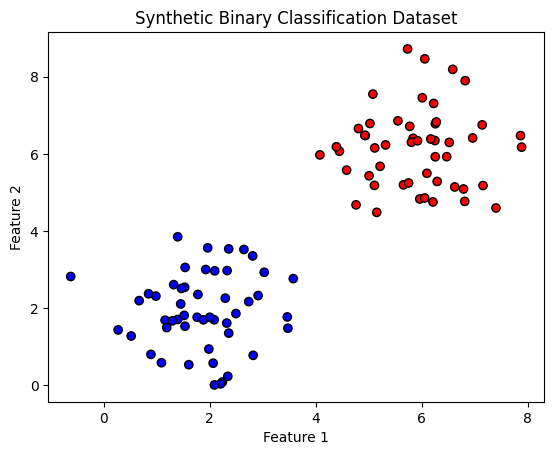

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 생성 (2차원)
np.random.seed(42)
X = np.vstack((np.random.normal([2, 2], 1, (50, 2)), np.random.normal([6, 6], 1, (50, 2))))
y = np.hstack((np.zeros(50), np.ones(50)))

# 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Binary Classification Dataset')
plt.show()


In [ ]:
# 엔트로피 계산 함수
def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# 지니 지수 계산 함수
def gini_index(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return 1 - np.sum([p ** 2 for p in probabilities])

Left node - Entropy: 0.5788, Gini Index: 0.2378
Right node - Entropy: -0.0000, Gini Index: 0.0000


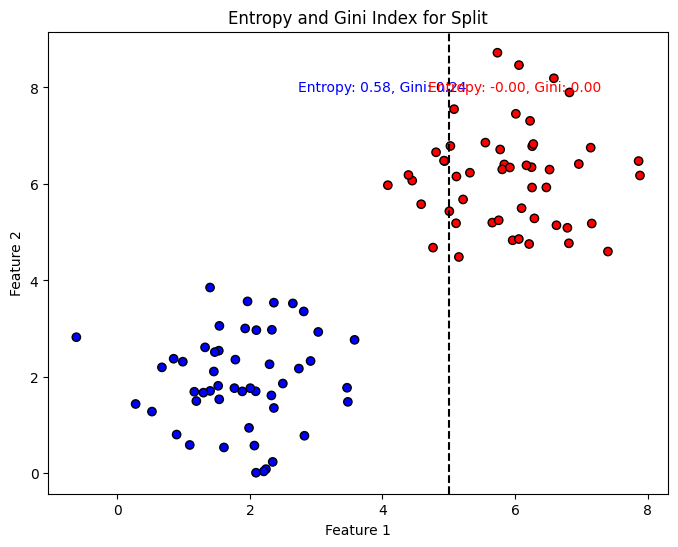

In [ ]:
# 데이터셋 분할
threshold = 5
left_mask = X[:, 0] <= threshold
right_mask = X[:, 0] > threshold

X_left, y_left = X[left_mask], y[left_mask]
X_right, y_right = X[right_mask], y[right_mask]

# 엔트로피 및 지니 지수 계산
entropy_left = entropy(y_left)
entropy_right = entropy(y_right)
gini_left = gini_index(y_left)
gini_right = gini_index(y_right)

# 결과 출력
print(f'Left node - Entropy: {entropy_left:.4f}, Gini Index: {gini_left:.4f}')
print(f'Right node - Entropy: {entropy_right:.4f}, Gini Index: {gini_right:.4f}')

# 시각화
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
ax.axvline(x=threshold, color='k', linestyle='--')
ax.text(threshold - 1, 8, f'Entropy: {entropy_left:.2f}, Gini: {gini_left:.2f}',
        verticalalignment='center', horizontalalignment='center', color='blue')
ax.text(threshold + 1, 8, f'Entropy: {entropy_right:.2f}, Gini: {gini_right:.2f}',
        verticalalignment='center', horizontalalignment='center', color='red')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Entropy and Gini Index for Split')
plt.show()

In [ ]:
# 예제 실행: Iris 데이터셋을 사용하여 트리 학습 및 평가
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터셋 로드
iris = load_iris()
X, y = iris.data, iris.target


In [ ]:
## DT를 학습시키기 위해서 필요한 함수

## 엔트로피, 지니계수
def entropy(y):
    #y 클래스의 분포를 계산
    classes, counts =np.unique(y, return_counts=True)
    # 각 클래스들의 확률 계산
    probabilities=counts/len(y)
    #엔트로피 계산 : 각 클래스에 확률에 로그 값을 곱한 후 음수 부호 붙여서 합산
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# 지니계수
def gini_index(y):
    #y 클래스의 분포를 계산
    classes, counts =np.unique(y, return_counts=True)
    # 각 클래스들의 확률 계산
    probabilities=counts/len(y)
    # 지니 계수 : 각 클래스의 확률의 제곱 값을 합산한 후 1 에서 빼는 것
    return 1 - np.sum([p ** 2 for p in probabilities])

##데이터의 분할 함수
def split_dataset(X,y,feature_index, threshold):
    #데이터의 특성이랑 임계값에 따라 데이터를 좌우로 나눈다.
    left_mask=X[:, feature_index] <=threshold
    right_mask=X[:, feature_index] >threshold
    return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

##분할시 최적의 분할을 찾아야 한다.
##임계값에 분할하면서 분할된 노드의 불순도들 계산
## gini, entropy로 계산
## 더 낮은 점수인지 따라서 분할 갱신한다.

def best_split(X,y, criterion='gini'):
    best_score= float('inf') # 초기 점수 설정
    best_feature = None # 최적의 인덱스 초기화
    best_threshold = None # 최적의 임계값 초기화

    # 각 피처에 대한 분할 시도
    # 반복문을 통해 X피처에 대한 분할 시도
    for feature_index in range(X.shape[1]):
        # 각 특성의 고유한 값들에 대한 분할 기준 시도
        # 임계점을 정해야 하는 것
        thresholds=np.unique(X[:, feature_index])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right =split_dataset(X,y,feature_index,threshold)
            #유효하지 않은 분할은 건너 뛰는 경우
            if len(y_left)==0 or len(y_right)==0:
                continue

            #분할된 노드의 불순도 계산
            if criterion =='gini':
                score =(len(y_left)* gini_index(y_left) + len(y_right)*gini_index(y_right)) /len(y)
            elif criterion =='entropy':
                score =(len(y_left)* entropy(y_left) + len(y_right)*entropy(y_right)) /len(y)

            # 분할에 대한 갱신이 필요하다.

            if score < best_score:
                best_score = score
                best_feature = feature_index
                best_threshold = threshold
                #최적값을 갱신한다.
    return best_feature, best_threshold


## 의사결정나무 트리 기준으로해서 분할을 최적으로 찾아야 한다. 쭉 내려가면서 더 이상 분할할 수 없는 리프 노드까지 내려가는 것

## 의사결정나무 노드 정의

class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature # 분할에 사용된 피처 인덱스
        self.threshold = threshold # 분할에 사용된 임계값
        self.left = left   # 좌측 자식노드
        self.right = right # 우측 자식노드
        self.value = value # 리프노드에 대한 클래스 값


## 트리를 생성하는 함수가 필요함
def build_tree(X,y, depth = 0, max_depth = None, criterion='gini'):
    #종료조건 : 가장 빈도가 높은 클래스를 리프 노드 값으로 설정
    #최적분할 : 더 이상 분할이 불가능한 경우는 리프 노드 반환
    #좌측,우측 데이서 노드 생성

    #종료조건
    if len(np.unique(y)) == 1 or (max_depth is not None and depth>= max_depth):
        return DecisionTreeNode(value=np.bincount(y).argmax())

    #최적 분할
    feature, threshold = best_split(X,y, criterion=criterion)
    if feature is None:
        return DecisionTreeNode(value=np.bincount(y).argmax())

    #데이터셋 분할
    #최적 분할 기준으로 데이터셋을 나눠야 한다.
    X_left, y_left, X_right, y_right =split_dataset(X,y, feature, threshold)
    #좌측 자식 노드 생성
    left_child =build_tree(X_left, y_left, depth+1, max_depth, criterion)
    #우측 자식 노드 생성
    right_child =build_tree(X_right, y_right, depth+1, max_depth, criterion)

    return DecisionTreeNode(feature = feature, threshold = threshold, left = left_child, right = right_child)


# 개별 데이터들에 대한 예측 함수
def predict(tree, X):
    if tree.value is not None:
        return tree.value
    feature_val =X[tree.feature]
    if feature_val <= tree.threshold:
        return predict(tree.left, X) # 좌측 자식노드 이동
    else:
        return predict(tree.right, X) #우측으로 자식노드 이동

# 예측 함수
def predict_batch(tree,X):
    return np.array([predict(tree, x) for x in X])

In [ ]:
# Iris 데이터 나누기
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=11)

In [ ]:
# 트리 학습 : 지니로 학습
tree_gini =build_tree(X_train, y_train, max_depth=3, criterion='gini')

tree_entropy=build_tree(X_train, y_train, max_depth=3, criterion='entropy')

In [ ]:
## 예측 및 정확도 평가
y_pred_gini=predict_batch(tree_gini, X_test)

In [ ]:
## 예측 및 정확도 평가
y_pred_entropy=predict_batch(tree_entropy, X_test)

In [ ]:
# 정확도 계산
np.mean(y_pred_gini == y_test)

0.9111111111111111

In [ ]:
np.mean(y_pred_entropy == y_test)

0.9111111111111111

### 사이킷런으로 불러오기!

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree # 시각화 가능

In [ ]:
df_clf=DecisionTreeClassifier(random_state=111)

In [ ]:
# Iris 데이터 나누기
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=11)

In [ ]:
#데이터 학습
df_clf =df_clf.fit(X_train,y_train)

[Text(0.375, 0.9, 'x[2] <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [36, 36, 33]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 1.55\ngini = 0.499\nsamples = 69\nvalue = [0, 36, 33]'),
 Text(0.25, 0.5, 'x[2] <= 5.25\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.5, 'x[2] <= 4.85\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(0.625, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

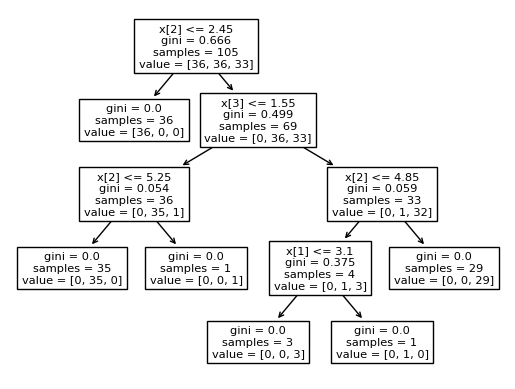

In [ ]:
tree.plot_tree(df_clf)

In [ ]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
export_graphviz(df_clf, out_file ='tree.dot',class_names = iris.target_names, feature_names = iris.feature_names, impurity =True, filled=True)

In [ ]:
cl_list=list(iris.target_names)

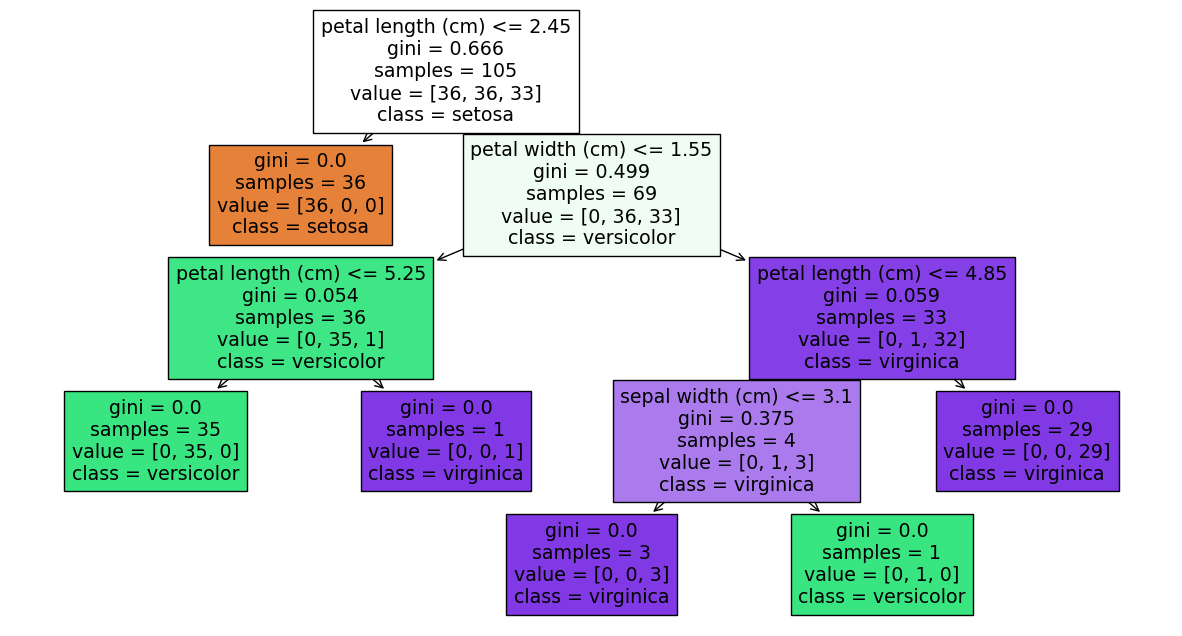

In [ ]:
import graphviz
fig = plt.figure(figsize=(15,8))
_=tree.plot_tree(df_clf,
              feature_names = iris.feature_names,
              class_names=cl_list,
              filled=True)
# 왼쪽이 참 오른쪽이 거짓 분할 기준

In [ ]:
#정확도 측정
from sklearn.metrics import accuracy_score

pred = df_clf.predict(X_test)
ac1 = accuracy_score(y_test, pred)

NameError: name 'df_clf' is not defined

In [ ]:
print(ac1)
print(df_clf.get_params())

0.9111111111111111
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 111, 'splitter': 'best'}


In [ ]:
import seaborn as sns
df_tt=sns.load_dataset('titanic')

In [ ]:
df_ttsp= df_tt[['survived','fare','pclass']]

### 과적합을 확인하기 위한 시각화 함수

In [ ]:
#classifier 의 Boundary 시각화 함수

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # train data scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 train data model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

## 튜닝하지 않고 전체 다 학습

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=111)

X_train, X_test, y_train, y_test = train_test_split(df_ttsp[['pclass','fare']], df_ttsp['survived'], test_size=0.3, random_state=111)
#학습
dt_clf = dt_clf.fit(X_train, y_train)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_18556/1819494650.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


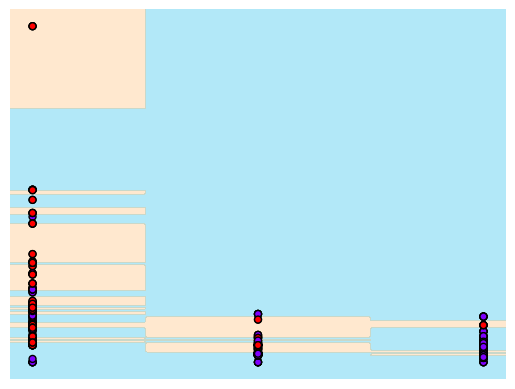

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
visualize_boundary(dt_clf, df_ttsp[['pclass','fare']], df_ttsp['survived'])

## 과적합을 막기 위해 하이퍼파라미터를 튜닝해 보자!

In [ ]:
dt_clf_2 = DecisionTreeClassifier(max_depth = 6 , min_samples_split = 5, random_state=111)


X_train, X_test, y_train, y_test = train_test_split(df_ttsp[['pclass','fare']], df_ttsp['survived'], test_size=0.3, random_state=111)


#학습
dt_clf_2 = dt_clf_2.fit(X_train, y_train)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_18556/1819494650.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


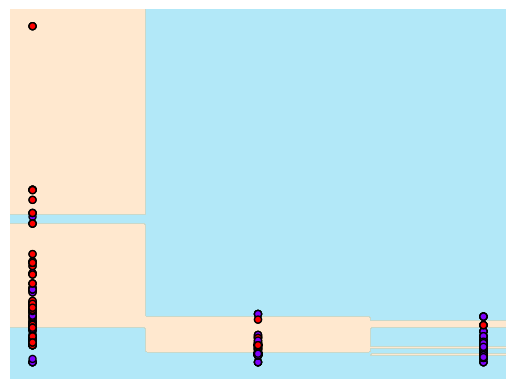

In [ ]:
visualize_boundary(dt_clf_2, df_ttsp[['pclass','fare']], df_ttsp['survived'])

In [ ]:
#정확도 측정
from sklearn.metrics import accuracy_score


In [ ]:
pred_train = dt_clf.predict(X_train)
ac_train = accuracy_score(y_train, pred_train)
pred_test = dt_clf.predict(X_test)
ac_test = accuracy_score(y_test, pred_test)


print('전체 학습한 트레인 정확도', ac_train)
print('전체 학습한 테스트 정확도', ac_test)

print(dt_clf.get_params())

전체 학습한 트레인 정확도 0.8073836276083467
전체 학습한 테스트 정확도 0.8097014925373134
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 111, 'splitter': 'best'}


### 튜닝을 한 경우

In [ ]:
pred_train = dt_clf_2.predict(X_train)
ac_train = accuracy_score(y_train, pred_train)
pred_test = dt_clf_2.predict(X_test)
ac_test = accuracy_score(y_test, pred_test)


print('전체 학습한 트레인 정확도', ac_train)
print('전체 학습한 테스트 정확도', ac_test)

print(dt_clf_2.get_params())

전체 학습한 트레인 정확도 0.7512038523274478
전체 학습한 테스트 정확도 0.7649253731343284
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': 111, 'splitter': 'best'}


### 교차검증 등 전체적인 내용 추가 정리

              precision    recall  f1-score   support

           0       0.72      0.77      0.75       122
           1       0.67      0.61      0.64        92

    accuracy                           0.70       214
   macro avg       0.69      0.69      0.69       214
weighted avg       0.70      0.70      0.70       214

Accuracy: 0.7009345794392523


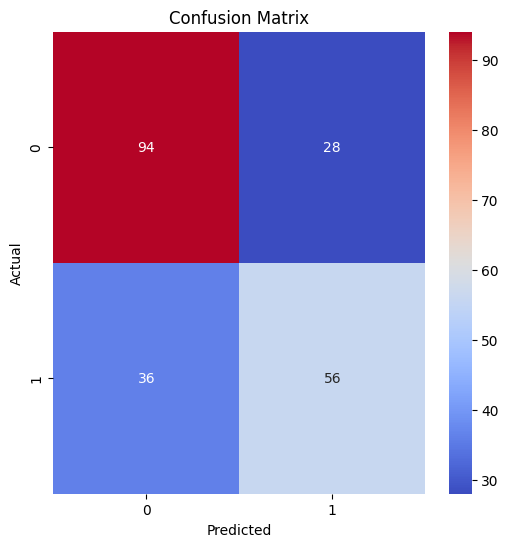

Cross-validation scores: [0.73426573 0.81118881 0.77464789 0.74647887 0.78169014]
Mean cross-validation score: 0.7696542893725992
Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation score: 0.8172121212121212
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       122
           1       0.74      0.65      0.69        92

    accuracy                           0.75       214
   macro avg       0.75      0.74      0.74       214
weighted avg       0.75      0.75      0.75       214

Accuracy: 0.7523364485981309


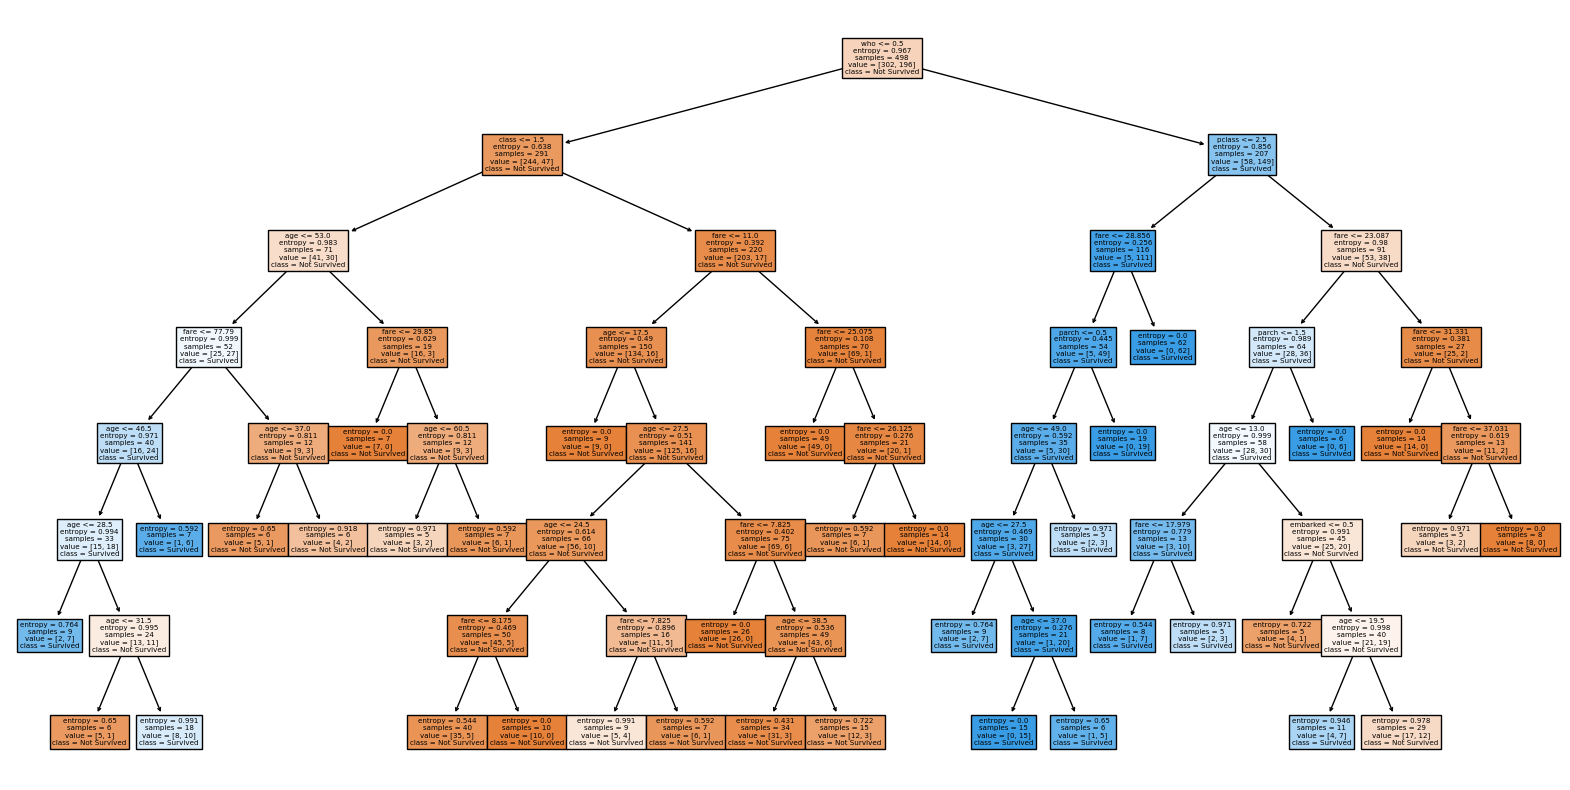

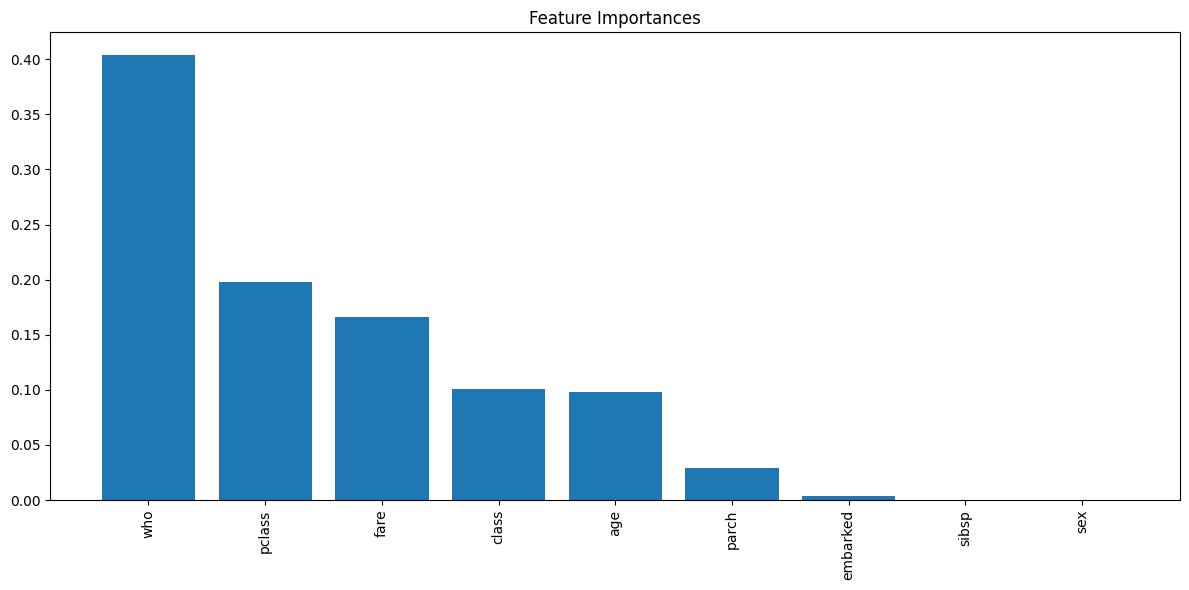

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 타이타닉 데이터셋 로드
# 데이터셋이 인터넷에서 로드되지 않으므로 로컬에 저장된 CSV 파일을 사용합니다.
titanic = sns.load_dataset('titanic')

# 데이터 전처리
titanic = titanic.dropna(subset=['age', 'embarked', 'fare', 'sex', 'class', 'who'])
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['class'] = titanic['class'].map({'First': 1, 'Second': 2, 'Third': 3})
titanic['who'] = titanic['who'].map({'man': 0, 'woman': 1, 'child': 2})

# 특성과 타겟 변수 설정
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who']]
y = titanic['survived']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 학습
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 예측 및 평가
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 교차 검증
cv_scores = cross_val_score(dt, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

# 하이퍼파라미터 튜닝
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

# 최적 모델로 예측 및 평가
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
print(classification_report(y_test, y_pred_best))
print(f'Accuracy: {accuracy_score(y_test, y_pred_best)}')

# 트리 구조 시각화
plt.figure(figsize=(20,10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()

# 피처 중요도
importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


### RandomForest 코드

In [ ]:
## Decision Tree- 패키지를 사용하고 RandomForest가 무엇이 다른지?

from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import numpy as np

In [ ]:
## 부트스트랩
## 다수결 보팅

class simpleRandomForest:
    def __init__(self, n_estimators= 10, max_depth=None, max_features = 'sqrt'):
        self.n_estimators= n_estimators #사용할 트리의 개수
        self.max_depth = max_depth #트리 최대 깊이
        self.max_features = max_features # 각 노드에서 사용할 최대 특성 개수
        self.trees = [] #학습에 필요한 트리 저장하는 리스트

    def fit(self,X,y):
        n_samples, n_features =X.shape

        #max_features 'sqrt'
        if self.max_features =='sqrt':
            self.max_features = int(np.sqrt(n_features))

        ##부트스트랩으로 샘플링
        for _ in range(self.n_estimators):
            # 부트스트랩 샘플링
            X_sample, y_sample=resample(X,y)

            #결정트리로 학습
            tree =DecisionTreeClassifier(max_depth =self.max_depth, max_features = self.max_features)
            tree.fit(X_sample, y_sample)

            #학습된 트리 저장
            self.trees.append(tree)

    def predict(self,X):
        #다수결 투표가 중요! voting
        tree_preds = np.array([tree.predict(X) for tree in self.trees])

        #다수결 투표
        return np.array([np.bincount(tree_preds[:, i]).argmax() for i in range(X.shape[0])])



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

# 트레인,테스트 나누기

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

In [ ]:
## srf

rf =simpleRandomForest(n_estimators = 10, max_depth= 5, max_features = 'sqrt')

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
predictions = rf.predict(X_test)

In [ ]:
predictions

array([0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2,
       1, 1, 2, 0, 0, 2, 0, 2])